<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 8.2: Boosting

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find an answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.9429
    - **ROC AUC**  = 0.9333
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first step is to identify the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ than **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, laborious, iterative and interactive process. It is part of the process to repeat, review and change when finding a dead-end.

## Scenario: Predicting Breast Cancer
The dataset you are going to be using for this laboratory is popularly known as the **Wisconsin Breast Cancer** dataset. The task related to it is Classification.

The dataset contains a total number of _10_ features labelled in either **benign** or **malignant** classes. The features have _699_ instances out of which _16_ feature values are missing. The dataset only contains numeric values.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.

* What are the main predictors of breast cancer?
* Can we accurately predict breast cancer diagnosis in the Wisconsin Breast Cancer data set?

## Actual Question
Choose the **one** question that should be answered.

# Step 2: Find the Data
### Blood Transfusion Service Center DataSet
- **Citation Request**

    This breast cancer databases was obtained from the **University of Wisconsin Hospitals**, **Madison** from **Dr. William H. Wolberg**. If you publish results when using this database, then please include this information in your acknowledgements.

- **Title**

    Wisconsin Breast Cancer Database (January 8, 1991)

- **Sources**
    - **Creator**
            Dr. WIlliam H. Wolberg (physician)
            University of Wisconsin Hospitals
            Madison, Wisconsin
            USA
    - **Donor**
            Olvi Mangasarian (mangasarian@cs.wisc.edu)
            Received by David W. Aha (aha@cs.jhu.edu)
    - **Date**
            15 July 1992
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/ml/about.html) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [1]:
## Import Libraries
import itertools
import re
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

from sklearn import preprocessing

from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, auc, average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score, roc_curve

from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
breast_cancer_csv = 'breast-cancer-wisconsin-data.csv'
with open(breast_cancer_csv, 'r') as file:
    bc = pd.read_csv(file, header=0)

# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or expurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [3]:
pd.DataFrame(zip(bc.columns, bc.dtypes, bc.isnull().sum()), columns=['feature', 'dtype', 'null_count'])

,feature,dtype,null_count
0,id,int64,0
1,diagnosis,object,0
2,radius_mean,float64,0
3,texture_mean,float64,0
4,perimeter_mean,float64,0
5,area_mean,float64,0
6,smoothness_mean,float64,0
7,compactness_mean,float64,0
8,concavity_mean,float64,0
9,concave points_mean,float64,0


In [4]:
bc.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


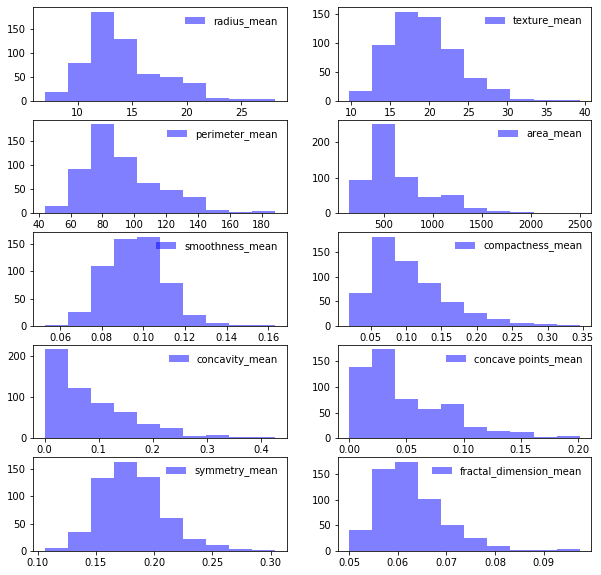

In [5]:
bc['diagnosis'] = bc['diagnosis'].astype('category')
bc['diagnosis_codes'] = bc['diagnosis'].cat.codes

col_mean = ['id', 'diagnosis', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32', 'diagnosis_codes']
ncols = 2
nrows = int(np.ceil(len(bc.drop(col_mean, axis=1).columns) / (1.0*ncols)))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10))

counter = 0
for i in range(nrows):
    for j in range(ncols):
        ax = axes[i][j]
        # Plot when we have data
        if counter < len(bc.drop(col_mean, axis=1).columns):
            ax.hist(bc[bc.drop(col_mean, axis=1).columns[counter]], bins=10, color='blue', alpha=0.5, label='{}'.format(bc.drop(col_mean, axis=1).columns[counter]))
            leg = ax.legend()
            leg.draw_frame(False)

        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()
        counter += 1

plt.show();

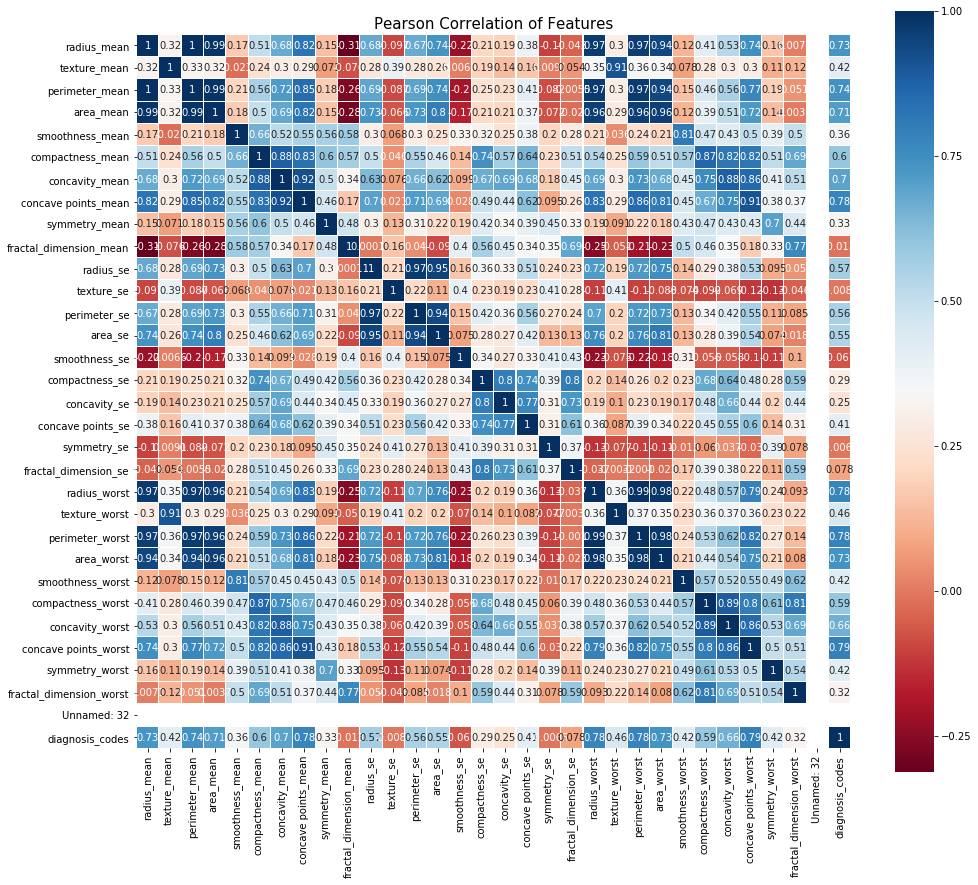

In [6]:
colormap = plt.cm.RdBu
plt.figure(figsize = (16, 14))
plt.title('Pearson Correlation of Features', size = 15)
sns.heatmap(bc.drop('id', axis=1).corr(),
            linewidths = 0.1,
            vmax = 1.0,
            square = True,
            cmap = colormap,
            linecolor = 'white',
            annot = True)
plt.show();

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engeneer** (if useful or necessary)

In [7]:
bc = bc.drop('Unnamed: 32', axis=1)
bc.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
diagnosis_codes            0
dtype: int64

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)? everything except diagnosis* and id
- Is there an output variable (label)? Yes
- If there is an output variable:
    - What is it? diagnosis
    - What is its type? category
- What type of Modelling is it?
    - [x] Supervised
    - [ ] Unsupervised 
- What type of Modelling is it?
    - [ ] Regression
    - [x] Classification (binary) 
    - [ ] Classification (multi-class)
    - [ ] Clustering

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when spliting

In [8]:
round(bc['diagnosis'].value_counts(normalize=True) * 100, 1)

B    62.7
M    37.3
Name: diagnosis, dtype: float64

In [9]:
y = bc['diagnosis_codes']
X = bc[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']]

scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)
print(scaler.mean_)

[1.41272917e+01 1.92896485e+01 9.19690334e+01 6.54889104e+02
 9.63602812e-02 1.04340984e-01 8.87993158e-02 4.89191459e-02
 1.81161863e-01 6.27976098e-02 1.62691898e+01 2.56772232e+01
 1.07261213e+02 8.80583128e+02 1.32368594e-01 2.54265044e-01
 2.72188483e-01 1.14606223e-01 2.90075571e-01 8.39458172e-02]


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20)

In [11]:
def show_summary_report(actual, prediction):

    if isinstance(actual, pd.Series):
        actual = actual.values.astype(int)
    prediction = prediction.astype(int)

    accuracy_ = accuracy_score(actual, prediction)
    precision_ = precision_score(actual, prediction)
    recall_ = recall_score(actual, prediction)
    roc_auc_ = roc_auc_score(actual, prediction)

    print('Accuracy : %.4f [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0' % accuracy_)
    print('Precision: %.4f [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0' % precision_)
    print('Recall   : %.4f [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0' % recall_)
    print('ROC AUC  : %.4f                                                                     Best: 1, Worst: < 0.5' % roc_auc_)
    print('-' * 107)
    print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, prediction)
    average_precision = average_precision_score(actual, prediction)
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, prediction)
    roc_auc = auc(fpr, tpr)


    # plot
    fig, ax = plt.subplots(1, 3, figsize = (18, 6))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues', ax = ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')
    
    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    ax[1].fill_between(recall, precision, alpha = 0.2, color = 'b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc = 'lower right')

    plt.show()
    
    return (accuracy_, precision_, recall_, roc_auc_)

# Step 8: Define and Fit Models

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [12]:
np.random.seed(0)
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 2)

# Step 9: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [13]:
num_est = [1, 2, 3, 10]
label = ['AdaBoost (n_est=%d)' % i for i in num_est]

grid = itertools.product([0, 1], repeat = 2)

for n_est, label, grd in zip(num_est, label, grid):     
    boosting = AdaBoostClassifier(base_estimator = clf, n_estimators = n_est)   
    boosting.fit(X_train, y_train)
    scores = cross_val_score(boosting, X_train, y_train, cv = 3, scoring = 'accuracy')
    print('Accuracy (train): %.4f (+/- %.2f) [%s]' % (scores.mean(), scores.std(), label))
    print(boosting.predict(X_train)[0:5])

Accuracy (train): 0.9208 (+/- 0.01) [AdaBoost (n_est=1)]
[0 1 0 1 0]
Accuracy (train): 0.9296 (+/- 0.02) [AdaBoost (n_est=2)]
[0 0 0 1 0]
Accuracy (train): 0.9319 (+/- 0.02) [AdaBoost (n_est=3)]
[0 0 0 1 0]
Accuracy (train): 0.9362 (+/- 0.01) [AdaBoost (n_est=10)]
[0 0 0 1 0]


# Step 10: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

In [14]:
num_est = [1, 2, 3, 10]
label = ['AdaBoost (n_est=%d)' % i for i in num_est]

grid = itertools.product([0, 1], repeat = 2)

for n_est, label, grd in zip(num_est, label, grid):
    boosting = AdaBoostClassifier(base_estimator = clf, n_estimators = n_est)   
    boosting.fit(X_train, y_train)
    scores = cross_val_score(boosting, X_train, y_train, cv = 3, scoring = 'accuracy')
    print('Accuracy (train): %.4f (+/- %.2f) [%s]' % (scores.mean(), scores.std(), label))
    print('Accuracy (test): %.4f' % (boosting.score(X_test, y_test)))
    print(boosting.predict(X_test)[0:5])

Accuracy (train): 0.9208 (+/- 0.01) [AdaBoost (n_est=1)]
Accuracy (test): 0.9386
[1 1 1 0 1]
Accuracy (train): 0.9274 (+/- 0.02) [AdaBoost (n_est=2)]
Accuracy (test): 0.9737
[1 1 1 0 1]
Accuracy (train): 0.9319 (+/- 0.02) [AdaBoost (n_est=3)]
Accuracy (test): 0.9649
[1 1 1 0 1]
Accuracy (train): 0.9362 (+/- 0.01) [AdaBoost (n_est=10)]
Accuracy (test): 0.9386
[1 1 1 0 1]


# Step 11: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

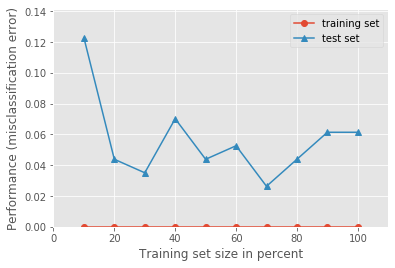

In [15]:
# plot learning curves
boosting = AdaBoostClassifier(base_estimator = clf, n_estimators = 10)

plt.figure()
plot_learning_curves(X_train, y_train, X_test, y_test, boosting, print_model = False, style = 'ggplot')
plt.show();

In [16]:
# Ensemble Size
num_est = np.linspace(1, 100, 20, dtype = np.int8)

np.random.seed(2534)

bg_clf_cv_mean = []
bg_clf_cv_std = []
for n_est in num_est:
    ada_clf = AdaBoostClassifier(base_estimator = clf, n_estimators = n_est)
    scores = cross_val_score(ada_clf, X, y, cv = 3, scoring = 'accuracy')
    bg_clf_cv_mean.append(scores.mean())
    bg_clf_cv_std.append(scores.std())

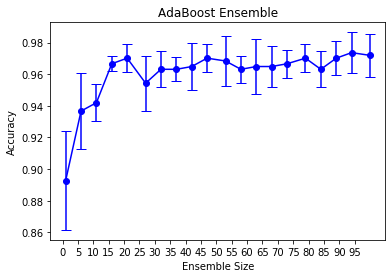

In [17]:
plt.figure()
(_, caps, _) = plt.errorbar(
    num_est,
    bg_clf_cv_mean,
    yerr = bg_clf_cv_std,
    c = 'blue',
    fmt = '-o',
    capsize = 5)

for cap in caps:
    cap.set_markeredgewidth(1)

plt.title('AdaBoost Ensemble')
plt.xticks(np.arange(0,100, 5))
plt.ylabel('Accuracy')
plt.xlabel('Ensemble Size')
plt.show()

Accuracy : 0.9386 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.8837 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9500 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9412                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


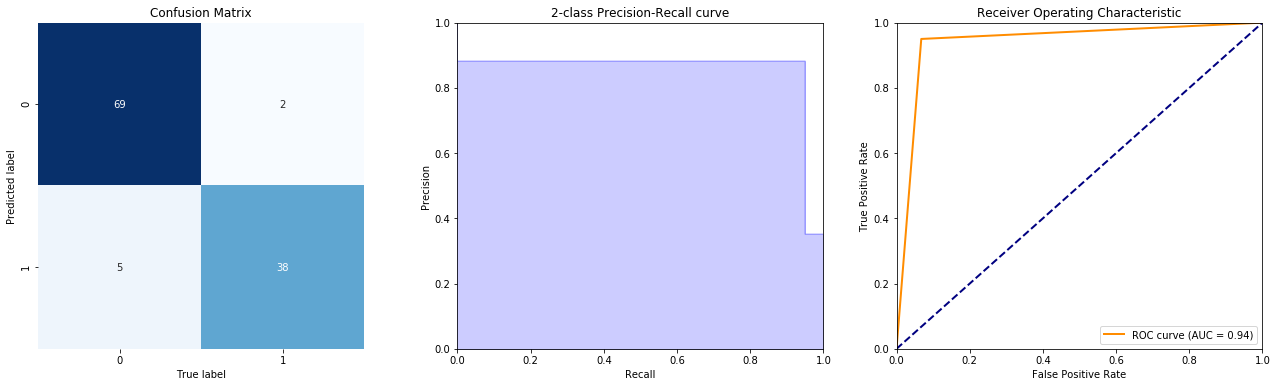

(0.9385964912280702, 0.8837209302325582, 0.95, 0.9412162162162162)

In [18]:
show_summary_report(y_test, boosting.predict(X_test))

>

>

>



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



